The contours from the MCMC seem to be too large. I'm going to take some points on the chain and plot the emulator prediciton along with the "truth" at that point and see if they make sense. Additionally, part of my concern is that the errors for the emulator are not right. If I draw a lot of samples from the emulator at that point vs several repops, they should be similar. 

In [8]:
from pearce.emulator import OriginalRecipe, ExtraCrispy
from pearce.mocks import cat_dict
import numpy as np
from os import path

In [9]:
import matplotlib
#matplotlib.use('Agg')
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
from chainconsumer import ChainConsumer

In [10]:
training_dir = '/u/ki/swmclau2/des/PearceLHC_wp_z_normal_errors'

em_method = 'gp'
split_method = 'random'

In [11]:
fixed_params = {'z':0.0}#, 'r':0.18477483}

In [12]:
emu = ExtraCrispy(training_dir,10,2,'random', method = em_method, fixed_params=fixed_params)

In [13]:
emu.scale_bin_centers

array([  0.0937359 ,   0.18477483,   0.29469917,   0.41375889,
         0.58091924,   0.81561308,   1.14512422,   1.60775928,
         2.25730085,   3.16925998,   4.44965447,   6.24733375,
         8.77128311,  12.31491873,  17.29019819,  24.27551166,  34.08292144])

In [14]:
emu.get_param_bounds('sigma_logM')

(0.2, 0.7)

In [15]:
emulation_point = [('f_c', 0.233), ('logM0', 12.0), ('sigma_logM', 0.333),
                    ('alpha', 1.053),('logM1', 13.5), ('logMmin', 12.033)]

em_params = dict(emulation_point)

em_params.update(fixed_params)
del em_params['z']

param_names = em_params.keys()

In [16]:
cosmo_params = {'simname':'chinchilla', 'Lbox':400.0, 'scale_factors':[1.0]}
cat = cat_dict[cosmo_params['simname']](**cosmo_params)

In [17]:
scale_factor = 1.0
HOD = 'redMagic'
cat.load(scale_factor, HOD=HOD)

In [18]:
rp_bins =  list(np.logspace(-1,1.5,19) )
rp_bins.pop(1)
rp_bins = np.array(rp_bins)
rpoints =  (rp_bins[1:]+rp_bins[:-1])/2.0

In [19]:
fname = '/u/ki/swmclau2/des/PearceMCMC/100_walkers_5000_steps_chain_large_errors.npy'

In [20]:
chain = np.genfromtxt(fname)

In [22]:
sample_idx = 1
#em_point = dict(zip(param_names, chain[sample_idx, :]))
#em_point = dict(zip(emu.get_param_names(), emu.x[sample_idx, :]))
em_point = dict(zip(emu.get_param_names(), emu.x[sample_idx, :]))

In [23]:
emu._ordered_params

OrderedDict([('logMmin', (11.7, 12.5)),
             ('sigma_logM', (0.2, 0.7)),
             ('logM0', (10, 13)),
             ('logM1', (13.1, 14.3)),
             ('alpha', (0.75, 1.25)),
             ('f_c', (0.1, 0.5)),
             ('r', (0.093735900000000011, 34.082921444999997))])

In [24]:
em_point

{'alpha': array([ 12.117     ,   0.555     ,  11.449     ,  13.829     ,
          1.035     ,   0.454     ,   0.50095787]),
 'f_c': array([ 12.003     ,   0.244     ,  12.549     ,  13.167     ,
          0.981     ,   0.473     ,  -0.73335719]),
 'logM0': array([ 12.245    ,   0.408    ,  11.575    ,  13.552    ,   0.877    ,
          0.107    ,   0.0588526]),
 'logM1': array([ 12.049     ,   0.323     ,  11.816     ,  14.158     ,
          1.036     ,   0.268     ,   0.20622102]),
 'logMmin': array([ 12.001     ,   0.664     ,  10.908     ,  13.843     ,
          0.999     ,   0.397     ,   1.53253681]),
 'r': array([ 12.407     ,   0.474     ,  12.976     ,  13.126     ,
          1.219     ,   0.415     ,  -0.73335719]),
 'sigma_logM': array([ 12.075     ,   0.437     ,  11.725     ,  13.437     ,
          1.117     ,   0.322     ,   0.20622102])}

In [25]:
colors = sns.color_palette("husl")
mock_color = colors[0]
emulator_color = colors[2]

In [26]:
print true_wp

NameError: name 'true_wp' is not defined

In [108]:
true_wp_errs/np.sqrt(n_repops)

array([ 0.00209754,  0.00171462,  0.00270575,  0.00253459,  0.00294978,
        0.00327155,  0.00399784,  0.00401551,  0.00361685,  0.0028892 ,
        0.00206353,  0.00262676,  0.00209266,  0.00310619,  0.00527247,
        0.00343469,  0.00668499])

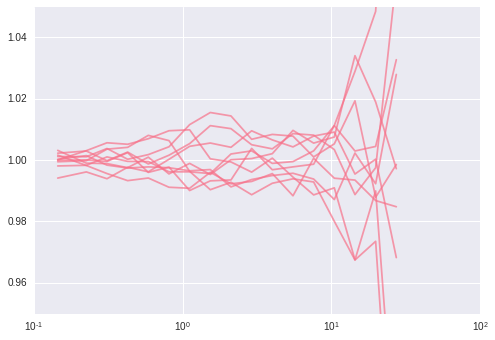

In [123]:
plt.plot(rpoints, (true_wp_samples/true_wp).T, color = mock_color, alpha = 0.7);
plt.ylim([0.95, 1.05])
plt.xscale('log')

In [28]:
emu.emulate_wrt_r(em_point, rpoints)

/u/ki/swmclau2/.conda/envs/hodemulator/lib/python2.7/site-packages/pearce/emulator/emu.py:383: UserWarning: One value for r is outside the bounds (0.094, 34.083) of the emulator.
  pname, plow, phigh))


ValueError: array must not contain infs or NaNs

In [27]:
MAP = chain.mean(axis = 0)
em_point = dict(zip(param_names, MAP))
print np.sum( ( (true_wp-emu.emulate_wrt_r(em_point, rpoints))/(true_wp_errs) )**2)

NameError: name 'true_wp' is not defined

In [110]:
(true_wp-emu.emulate_wrt_r(em_point, rpoints))/true_wp_errs

array([[-16.69542764, -22.4876462 , -13.77470447, -13.93359851,
        -11.03962012,  -8.8317279 ,  -6.32030995,  -4.36582549,
         -3.09686489,  -4.97890701,  -6.60491542,  -4.5602991 ,
         -6.67843814,  -3.53565068,  -2.04078573,  -3.63070902,
         -1.62744048]])

In [111]:
true_wp_errs

array([ 0.00663301,  0.00542211,  0.00855634,  0.00801506,  0.00932803,
        0.01034554,  0.01264228,  0.01269816,  0.01143748,  0.00913645,
        0.00652546,  0.00830653,  0.00661757,  0.00982265,  0.016673  ,
        0.01086144,  0.02113979])

In [112]:
print np.sum( ( (true_nd_samples.mean()-cat.calc_analytic_nd(em_point))/(true_nd_samples.std()) )**2)

2205.26964888


In [113]:
cat.calc_analytic_nd(em_point)

0.0014003319672255823

In [114]:
true_nd_samples.mean()

0.0015561359374999999

In [26]:
_emu = emu
_cat = cat
global _emu
global _cat

In [27]:
from itertools import izip
def lnprior(theta, param_names, *args):
    """
    Prior for an MCMC. Default is to assume flat prior for all parameters defined by the boundaries the
    emulator is built from. Retuns negative infinity if outside bounds or NaN
    :param theta:
        The parameters proposed by the sampler.
    :param param_names
        The names identifying the values in theta, needed to extract their boundaries
    :return:
        Either 0 or -np.inf, depending if the params are allowed or not.
    """
    for p, t in izip(param_names, theta):
        low, high = _emu.get_param_bounds(p)
        if np.isnan(t) or t < low or t > high:
            return -np.inf
    return 0


def lnlike(theta, param_names, r_bin_centers, y, combined_inv_cov, obs_nd, obs_nd_err, nd_func_name):
    """
    :param theta:
        Proposed parameters.
    :param param_names:
        The names of the parameters in theta
    :param r_bin_centers:
        The centers of the r bins y is measured in, angular or radial.
    :param y:
        The measured value of the observable to compare to the emulator.
    :param combined_inv_cov:
        The inverse covariance matrix. Explicitly, the inverse of the sum of the mesurement covaraince matrix
        and the matrix from the emulator. Both are independent of emulator parameters, so can be precomputed.
    :param obs_nd
        Observed number density
    :param obs_nd_err
        Uncertainty in the observed nd
    :param nd_func
        Function that can compute the number density given a dictionary of HOD params.
    :return:
        The log liklihood of theta given the measurements and the emulator.
    """
    param_dict = dict(izip(param_names, theta))
    y_bar = _emu.emulate_wrt_r(param_dict, r_bin_centers)[0]
    # should chi2 be calculated in log or linear?
    # answer: the user is responsible for taking the log before it comes here.
    delta = y_bar - y

    chi2 = -0.5 * np.dot(delta, np.dot(combined_inv_cov, delta))

    #print y_bar
    #print y
    #print obs_nd-getattr(_cat, nd_func_name)(param_dict),obs_nd, getattr(_cat, nd_func_name)(param_dict)
    #print chi2,
    #return chi2 - 0.5*((obs_nd-getattr(_cat, nd_func_name)(param_dict))/obs_nd_err)**2
    return chi2, chi2 - 0.5*((obs_nd-getattr(_cat, nd_func_name)(param_dict))/obs_nd_err)**2


def lnprob(theta, *args):
    """
    The total liklihood for an MCMC. Mostly a generic wrapper for the below functions.
    :param theta:
        Parameters for the proposal
    :param args:
        Arguments to pass into the liklihood
    :return:
        Log Liklihood of theta, a float.
    """
    lp = lnprior(theta, *args)
    if not np.isfinite(lp):
        return -np.inf

    return lp + lnlike(theta, *args)


In [28]:
from scipy.linalg import inv
cov = np.cov(true_wp_samples.T)
#cov/=n_repops
cov*=10
combined_inv_cov = inv(np.diag(_emu.ycov)+cov)

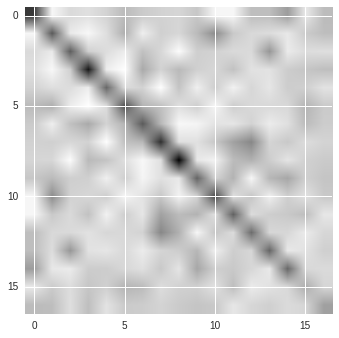

In [29]:
plt.imshow(combined_inv_cov)

In [30]:
print np.sqrt(np.diag(cov))

[ 0.02021142  0.03078334  0.02003874  0.02720543  0.03155438  0.03144383
  0.02854052  0.0170365   0.0202627   0.0282202   0.03053264  0.01741168
  0.02226164  0.01914338  0.01793872  0.03275594  0.03627023]


In [31]:
obs_nd = true_nd_samples.mean()
obs_nd_err = true_nd_samples.std()
nd_func_name = 'calc_analytic_nd'

In [32]:
args = (param_names, rpoints, true_wp_samples.mean(axis = 0), combined_inv_cov, obs_nd, obs_nd_err, nd_func_name)

In [33]:
true_point = np.array([em_params[p] for p in param_names])
true_chi2 =  lnlike(true_point, *args)
print true_chi2

(-17.201516209409434, -17.205148955569673)


In [34]:
chi2s = []
chi2nds = []
for i in xrange(chain.shape[0]/200):
    sample_idx = i*100+chain.shape[0]/2
    chi2, chi2_nd = lnlike(chain[sample_idx, :], *args)
    chi2s.append(chi2)
    chi2nds.append(chi2s)
    
chi2s = np.array(chi2s)*-2
chi2nds = np.array(chi2s)*-2

In [35]:
print chi2s.shape

(2500,)


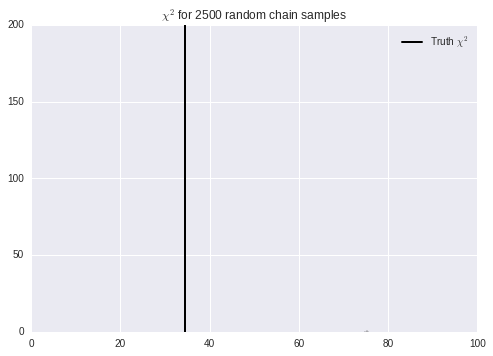

In [36]:
idxs = chi2s < 100
plt.hist(chi2s[idxs], bins = 100);
plt.xlim([0, 100])
plt.vlines(true_chi2[0]*-2,0,200, lw = 2, label = r'Truth $\chi^2$')
plt.title(r'$\chi^2$ for 2500 random chain samples')
plt.legend(loc='best')
plt.show()